In [2]:
#Import the necessary packages

import numpy as np
import matplotlib.pyplot as plt

In [1]:
#First build an abstract Layer class that will be used for linear and 
#activation layers
#Both layers will contain forward and backward functions

class Layer():
    def __init__(self):
        #Only shared variable is input
        self.input = None
        
    def forward(self, input_data):
        raise NotImplementedError()
        
    def backward(self, error, lr):
        raise NotImplementedError()

In [4]:
class Linear(Layer):
    def __init__(self, input_size, output_size):
        super(Linear, self).__init__()
        self.weights = np.random.rand(input_size,output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5
        
    def forward(self, input_data):
        self.input = input_data
        out = np.dot(self.input, self.weights)+self.bias
        return out
    
    def backward(self, error, lr):
        input_error = np.dot(error, self.weights.T)
        weight_error = np.dot(self.input.T, error)
        
        self.weights -= lr*weight_error
        self.bias -= lr*error
        
        return input_error

In [5]:
class Activation(Layer):
    def __init__(self, act, act_prime):
        super(Activation, self).__init__()
        self.activation = act
        self.activation_prime = act_prime
    
    def forward(self, input_data):
        self.input = input_data
        return self.activation(self.input)
    
    def backward(self, error, lr):
        error = self.activation_prime(self.input)*error
        return error

In [6]:
class Network():
    def __init__(self, loss, loss_prime):
        self.layers = []
        self.loss = loss
        self.loss_prime = loss_prime
        self.errors = []
        self.epochs = None
        
    def add_layer(self, layer):
        #Can add activation or linear layer here
        self.layers.append(layer)
        
    def predict(self, input_data):
        input_size = len(input_data)
        prediction = []
        #Forward Propagation
        for i in range(input_size):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward(output)
            prediction.append(output)
        
        return prediction
    
    def train(self, x, y, epochs, lr):
        sample_size = len(x)
        self.epochs = epochs
        
        for epoch in range(epochs):
            error = 0
            for j in range(sample_size):
                #Forward
                output = x[j]
                for layer in self.layers:
                    output = layer.forward(output)
                
                #Update error
                error += self.loss(output, y[j])
                running_error = self.loss_prime(output, y[j])
                
                #Backward
                for layer in reversed(self.layers):
                    running_error = layer.backward(running_error, lr)
                    
            error /= sample_size
            self.errors.append(error)
            print("Epoch %d/%d, Error = %f" %(epoch+1, epochs, error))
        
    def plot_error(self, title):
        #Method to plot errors after training
        x = np.linspace(1, self.epochs, self.epochs)
        y = self.errors
        plt.plot(x, y)
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.show()

In [8]:
#Some activation functions

#ReLU
def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    x[x>0] = 1
    x[x<=0] = 0
    return x

#Sigmoid
def sigmoid(x):
    e = 1/(1+np.exp(-x))
    return e/e.sum(axis = 0)

def sigmoid_prime(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

#tanh
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1-np.tanh(x)**2

In [9]:
#Loss Function
def mse(y_pred, y):
    return np.mean(np.power(y_pred - y, 2))

def mse_prime(y_pred, y):
    return 2*(y_pred - y)/float(y.size)

In [11]:

from keras.datasets import mnist
from keras.utils import np_utils

# load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape and normalize input data, encode output data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)

# same for test data
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

# Network
MyNet = Network(mse, mse_prime)
MyNet.add_layer(Linear(28*28, 100))               
MyNet.add_layer(Activation(tanh, tanh_prime))
MyNet.add_layer(Linear(100, 100))                 
MyNet.add_layer(Activation(tanh, tanh_prime))
MyNet.add_layer(Linear(100, 50))                 
MyNet.add_layer(Activation(tanh, tanh_prime))
MyNet.add_layer(Linear(50, 10))                    
MyNet.add_layer(Activation(tanh, tanh_prime))

# train on 1000 samples
MyNet.train(x_train[0:1000], y_train[0:1000], epochs=200, lr=0.09)

# test on 3 samples
out = MyNet.predict(x_test[0:3])
print("\n")
print("predicted values : ")
print(out, end="\n")
print("true values : ")
print(y_test[0:3])

Epoch 1/200, Error = 0.244942
Epoch 2/200, Error = 0.099208
Epoch 3/200, Error = 0.074093
Epoch 4/200, Error = 0.058111
Epoch 5/200, Error = 0.046121
Epoch 6/200, Error = 0.037907
Epoch 7/200, Error = 0.032112
Epoch 8/200, Error = 0.027669
Epoch 9/200, Error = 0.024160
Epoch 10/200, Error = 0.021077
Epoch 11/200, Error = 0.018869
Epoch 12/200, Error = 0.016970
Epoch 13/200, Error = 0.015425
Epoch 14/200, Error = 0.014038
Epoch 15/200, Error = 0.012750
Epoch 16/200, Error = 0.011604
Epoch 17/200, Error = 0.010567
Epoch 18/200, Error = 0.009794
Epoch 19/200, Error = 0.009088
Epoch 20/200, Error = 0.008512
Epoch 21/200, Error = 0.008015
Epoch 22/200, Error = 0.007486
Epoch 23/200, Error = 0.007097
Epoch 24/200, Error = 0.006901
Epoch 25/200, Error = 0.006678
Epoch 26/200, Error = 0.006544
Epoch 27/200, Error = 0.006083
Epoch 28/200, Error = 0.005871
Epoch 29/200, Error = 0.005615
Epoch 30/200, Error = 0.005279
Epoch 31/200, Error = 0.005065
Epoch 32/200, Error = 0.004884
Epoch 33/200, Err

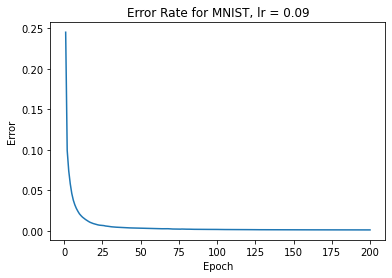

In [12]:
MyNet.plot_error('Error Rate for MNIST, lr = 0.09')